<a href="https://colab.research.google.com/github/nhlong1512/IS252.N21/blob/main/Final/ARIMA_7_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
# Dùng thư viện yfinance để tải dataset 
import yfinance as yf

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
import math

In [2]:
df = pd.read_csv('SP500.csv')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-10-05,1135.170044,1137.869995,1132.030029,1134.479980,1134.479980,1418400000
1,2004-10-06,1134.479980,1142.050049,1132.939941,1142.050049,1142.050049,1416700000
2,2004-10-07,1142.050049,1142.050049,1130.500000,1130.650024,1130.650024,1447500000
3,2004-10-08,1130.650024,1132.920044,1120.189941,1122.140015,1122.140015,1291600000
4,2004-10-11,1122.140015,1126.199951,1122.140015,1124.390015,1124.390015,943800000


**<h3>ARIMA 7-2-1</h3>**

In [3]:
df = df[['Date', 'Close']]
df = df.dropna() # Drop missing values
# df = df.reset_index(drop=True) # Reset the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]
print(df)

                  Close
Date                   
2004-10-05  1134.479980
2004-10-06  1142.050049
2004-10-07  1130.650024
2004-10-08  1122.140015
2004-10-11  1124.390015
...                 ...
2017-09-29  2519.360107
2017-10-02  2529.120117
2017-10-03  2534.580078
2017-10-04  2537.739990
2017-10-05  2552.070068

[3275 rows x 1 columns]


In [4]:
print(len(df))
print(len(train_data))
print(train_size)

3275
2292
2292


In [5]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.3 MB/s eta 0:00:00


In [6]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18856.807, Time=2.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18883.624, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18857.927, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18855.056, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18882.420, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18853.845, Time=0.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18854.846, Time=2.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18854.993, Time=4.60 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=18853.398, Time=1.50 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=18855.083, Time=2.96 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18856.963, Time=4.94 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=18852.520, Time=0.67 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=18854.088, Time=0.59 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=18854.102, Time=1.30 sec
 ARIMA(0,1,3)(0,0,0

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [7]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [8]:
import datetime
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
print(last_index)
next_30_days_index = pd.date_range(start=last_index + datetime.timedelta(days=1), periods=30, freq='D')
print(next_30_days_index)
# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(next_30_days_index).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days)) 

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

2017-10-05 00:00:00
DatetimeIndex(['2017-10-06', '2017-10-07', '2017-10-08', '2017-10-09',
               '2017-10-10', '2017-10-11', '2017-10-12', '2017-10-13',
               '2017-10-14', '2017-10-15', '2017-10-16', '2017-10-17',
               '2017-10-18', '2017-10-19', '2017-10-20', '2017-10-21',
               '2017-10-22', '2017-10-23', '2017-10-24', '2017-10-25',
               '2017-10-26', '2017-10-27', '2017-10-28', '2017-10-29',
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-04'],
              dtype='datetime64[ns]', freq='D')
Predicted closing prices for the next 30 days:
[1769.10880367 1768.24909942 1768.24909942 1768.24909942 1768.24909942
 1768.24909942 1768.24909942 1768.24909942 1768.24909942 1768.24909942
 1768.24909942 1768.24909942 1768.24909942 1768.24909942 1768.24909942
 1768.24909942 1768.24909942 1768.24909942 1768.24909942 1768.24909942
 1768.24909942 1768.24909942 1768.24909942 1768.24909942 176

In [9]:
# 12. Đánh giá độ chính xác thuật toán
import sklearn.metrics as metrics
mae = mean_absolute_error(y_test,y_pred)
print('MAE:', mae)

MAE: 220.270050540954


In [10]:
mse = mean_squared_error(y_test,y_pred)
print('MSE:', mse)

MSE: 58415.481290468844


In [11]:
rmse = math.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE:', rmse)

RMSE: 241.69294836728034


In [12]:
r2 = r2_score(y_test, y_pred)
print('r2:', r2)

r2: -4.857896704916484


In [13]:
def mape(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test))
    return mape
mape = mape(y_test, y_pred)
print('MAPE:', mape)

MAPE: 0.10847957874771322


Validation RMSE: 550.8559540697613
Testing RMSE: 241.69294836728034
Validation MAPE: 0.22981254432312884
Testing MAPE: 0.10847957874771322


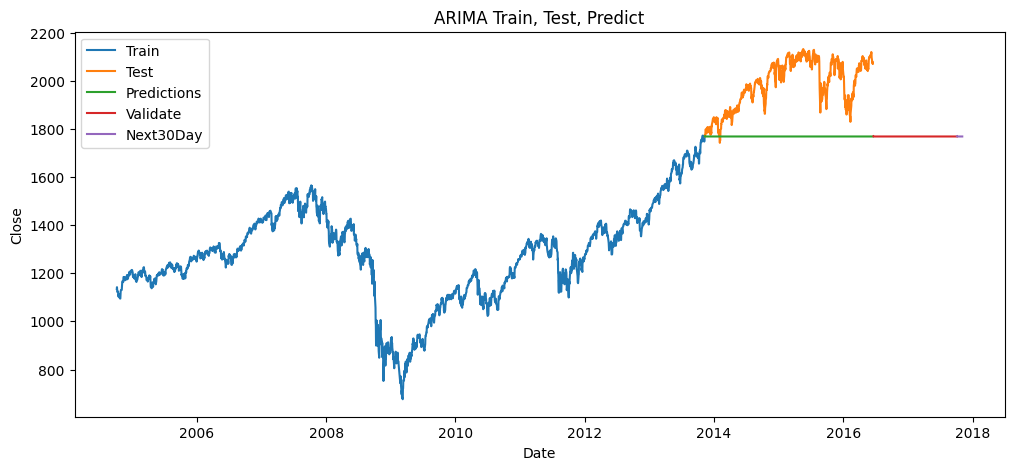

In [14]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mape = np.mean(np.abs(y_pred_val - y_val)/np.abs(y_val))  # MAPE
test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))  # MAPE
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
# 9.Vẽ hình
plt.figure(figsize=(12,5), dpi=100)
plt.ylabel('Close');
plt.xlabel('Date');
plt.title('ARIMA Train, Test, Predict')
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
# plt.plot(last_data,y_next_30_days)
plt.plot(next_30_days_index,y_next_30_days)

plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()